# <u>**Part 9**

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy.linalg import norm
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### **Exercise 81**


Load factory.csv file into the df DataFrame. This file contains two variables item_length and item_width. The distribution of these variables is shown below:



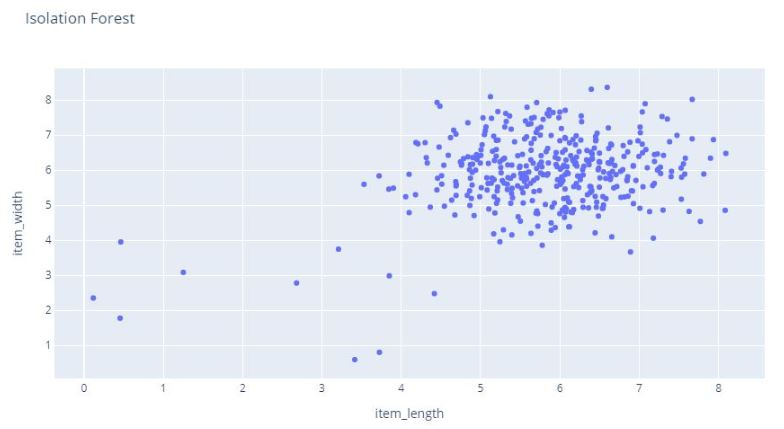



Using the *IsolationForest* class from the *scikit-learn*, analyze the outliers in this dataset. Set following arguments:

* `n_estimators=100`
* `contamination=0.05`
* `random_state=42`

As a reminder, 1 is the normal element, -1 is the outlier. Assign a new column to the df object named 'outlier_flag' that stores information whether the sample is normal or outlier. In response, print the first ten rows of the df object to the console.



In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv('factory.csv')
df.head(5)

,item_length,item_width
0,6.206380,5.618286
1,5.756649,5.921924
2,5.576329,5.792401
3,5.304950,7.235000
4,6.764064,5.965792


In [4]:
outlier = IsolationForest(n_estimators=100,
                          contamination=0.05,
                          random_state=42)

In [5]:
outlier.fit(df)
df['outlier_flag'] = outlier.predict(df)
df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,item_length,item_width,outlier_flag
0,6.206380,5.618286,1
1,5.756649,5.921924,1
2,5.576329,5.792401,1
3,5.304950,7.235000,1
4,6.764064,5.965792,1
5,5.668838,5.708257,1
6,6.241278,6.533104,1
7,5.951632,6.503750,1
8,7.192132,6.249855,1
9,5.999551,7.660598,1


### **Exercise 82**

Find the number of outliers in this dataset and print the result to the console.



In [6]:
df['outlier_flag'].value_counts()

 1    380
-1     20
Name: outlier_flag, dtype: int64

### **Exercise 83**

Using the `load_digits()` function from the scikit-learn package, load image data with the 8x8 resolution into the following variables:

* data - images as a numpy array with (1797, 64) shape
* target - labels as a numpy array with (1797,) shape

Explore this dataset. Try to display some images.

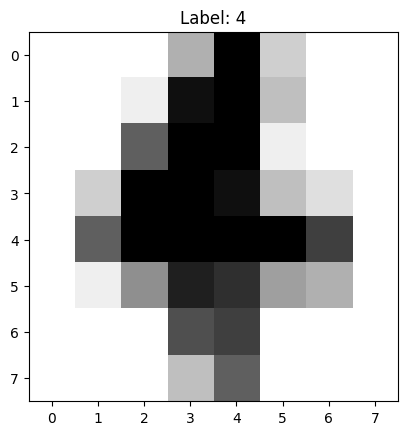

In [7]:
data, target = load_digits(return_X_y=True)

idx = 250
plt.imshow(data[idx].reshape(8, 8), cmap='gray_r')
plt.title(f'Label: {target[idx]}')
plt.show()

In [8]:
target[250]

4

### **Exercise 84**

Standardize the data variable. Then using the train_test_split() function (set the parameter random_state=42) split the data into train and test set:

* `X_train, y_train`
* `X_test, y_test`

In response, print the shapes of these arrays.

In [9]:
data = data / data.max()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1347, 64)
y_train shape: (1347,)
X_test shape: (450, 64)
y_test shape: (450,)


### **Exercise 85**

Create a multi-class classification model using the KNeighborsClassifier class from the scikit-learn package. Fit the model on the train data and then evaluate on the test data. In response, print the accuracy of the model to the console.

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)
print(f'KNN accuracy: {acc:.4f}')

KNN accuracy: 0.9933


### **Exercise 86**

Create a classification model using the LogisticRegression class from the scikit-learn package. Fit the model on the train data and then evaluate on the test data. In response, print the accuracy of the model to the console.

In [12]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)
acc = classifier.score(X_test, y_test)
print(f'Logistic Regression accuracy: {acc:.4f}')

Logistic Regression accuracy: 0.9689


### **Exercise 87**

